## Customer Churn Analysis

In [94]:
#importing all the required libreries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
import joblib


## Examining Data

In [3]:
#reading csv file
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
#checking dataset head
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* Dataset contains float64(1), int64(2), object(18) type of data.

In [7]:
#data type
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* There are few types data in dataset.

In [8]:
#dataset shape
df.shape

(7043, 21)

* dataset contains 7043 rows and 21 columns.

In [9]:
#cheching columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

* dataset contains 21 columns.

## Summary Statistics

In [10]:
#describing dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
#churn unique 
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

* Target and Dependent variable is discreate and categoricle in nature.

In [12]:
#value counts
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Dataset contains some categorical values

## Data Visualizations

<AxesSubplot:xlabel='customerID', ylabel='count'>

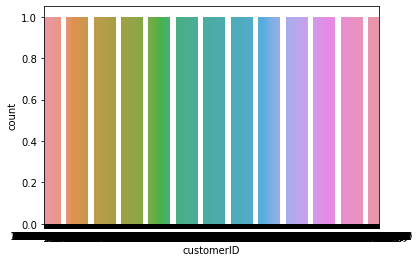

In [15]:
#ploting sns countplot
sns.countplot(df['customerID'])

* Data is nornally distributed in this column.

<AxesSubplot:xlabel='gender', ylabel='count'>

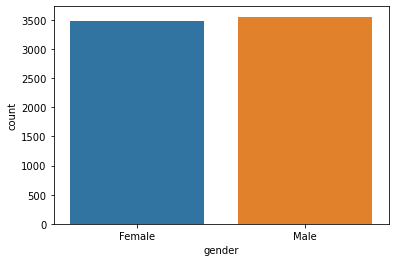

In [16]:
#ploting sns count plot
sns.countplot(df['gender'])

* Look like data is normally distributed.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

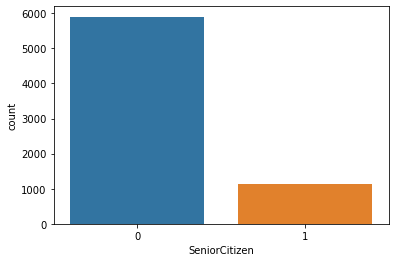

In [17]:
#ploting sns countplot
sns.countplot(df['SeniorCitizen'])

* Here data is not distributed normally.

<AxesSubplot:xlabel='Partner', ylabel='count'>

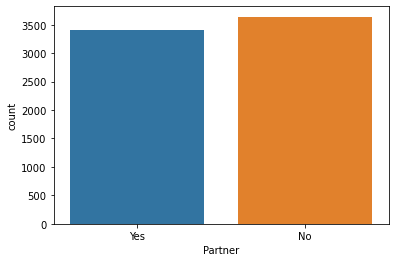

In [18]:
#ploting sns countplot 
sns.countplot(df['Partner'])

* here data is not distributed normally

<AxesSubplot:xlabel='Dependents', ylabel='count'>

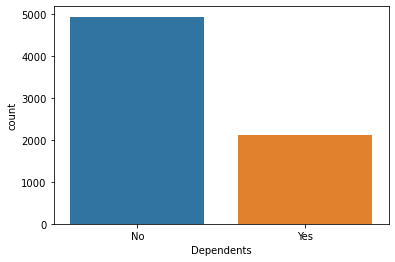

In [19]:
#ploting sns countplot 
sns.countplot(df['Dependents'])

* Here also data is not distributed normally.

<AxesSubplot:xlabel='tenure', ylabel='count'>

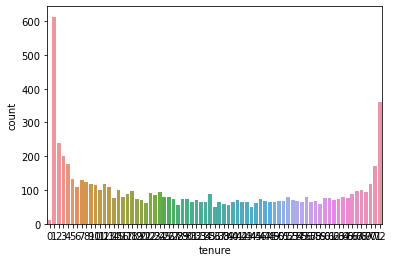

In [20]:
#ploting sns countplot 
sns.countplot(df['tenure'])

* In this plot also data is not distributed normally.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='count'>

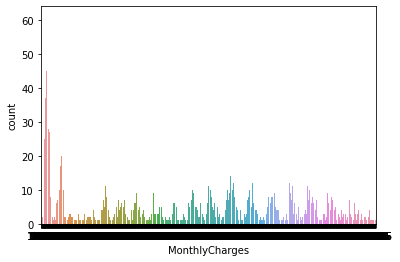

In [21]:
#ploting sns countplot 
sns.countplot(df['MonthlyCharges'])

* Data is not distributed in this columns.

<AxesSubplot:xlabel='Churn', ylabel='count'>

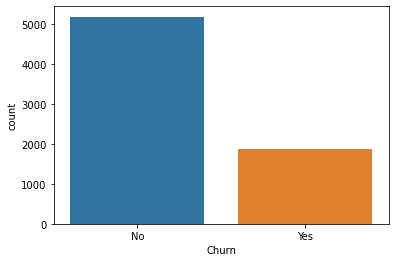

In [22]:
#ploting sns countplot 
sns.countplot(df['Churn'])

* Data is not distributed noarmally in this column

<AxesSubplot:>

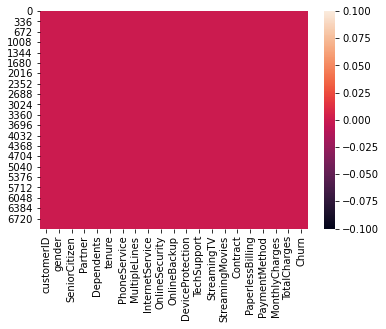

In [23]:
#ploting heatmap
sns.heatmap(df.isnull())

* We can see the null values of the Dataset

In [25]:
#correlation
dfcor=df.corr()
dfcor

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


<AxesSubplot:>

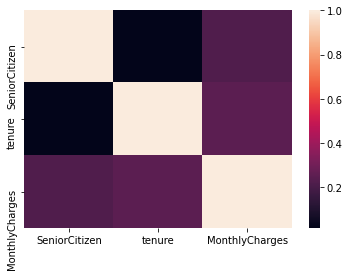

In [26]:
#heatmap 
sns.heatmap(dfcor)

* This plot contains the difference of corresponding values of datset.
* Light shades are higly correlated.

<AxesSubplot:>

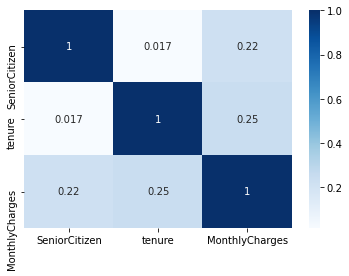

In [27]:
#ploting heatmap
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

* Dark shades are higly correlated.

<AxesSubplot:>

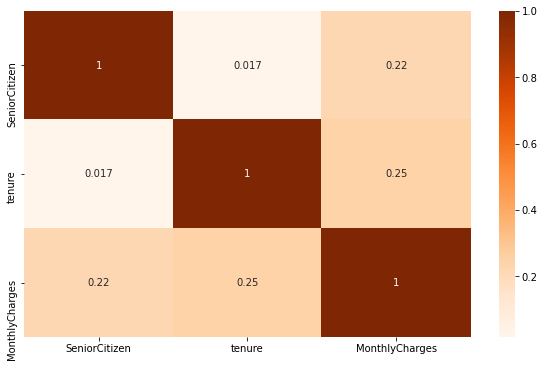

In [28]:
#ploting heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

* Light shades are highly correlated

## Plotting Outliers

In [29]:
#checking columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

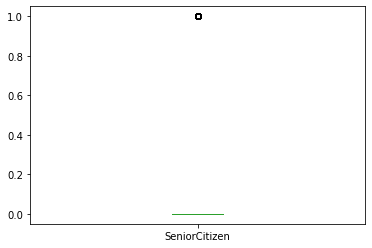

In [30]:
#ploting Senior Citizen
df['SeniorCitizen'].plot.box()

* This box plot have outside the viscous so we can find outliers easily.

<AxesSubplot:>

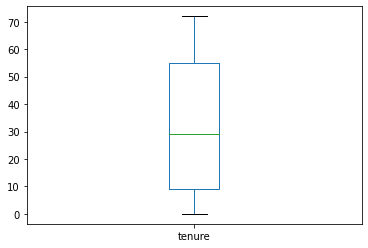

In [31]:
#ploting boxplot for tenure
df['tenure'].plot.box()

* This box plot looks normal

<AxesSubplot:>

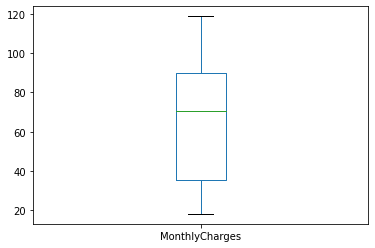

In [32]:
#ploting boxplot for Monthly Chargers
df['MonthlyCharges'].plot.box()

* The box plot looks normal

In [33]:
#checking data shape
df.shape

(7043, 21)

* Dataset contains 7043 rows and 21 columns.

## Ploting Skewness

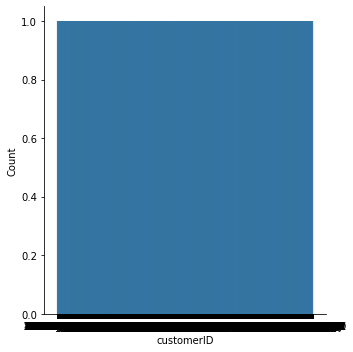

In [34]:
#plotinf displot
sns.displot(df['customerID'])

* data looks normal in this column.

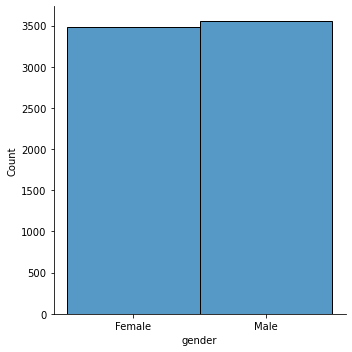

In [35]:
#ploting sns displot  for gender
sns.displot(df['gender'])

* This column is not distributed normally.

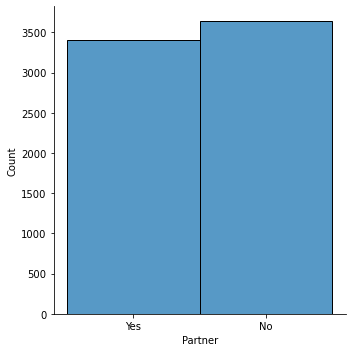

In [36]:
#ploting displot for dependents
sns.displot(df['Partner'])

* This column data is not distributed normally.

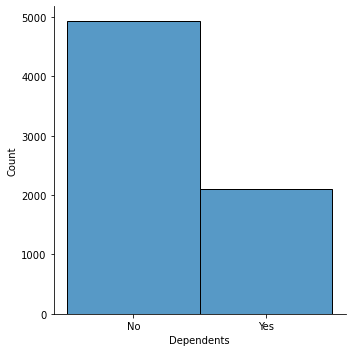

In [37]:
#ploting displot for dependents
sns.displot(df['Dependents'])

* This column data is not distributed normally.

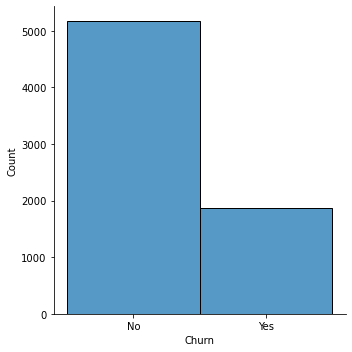

In [38]:
#ploting displot for dependents
sns.displot(df['Churn'])

* Data is not distributed normally in this column.

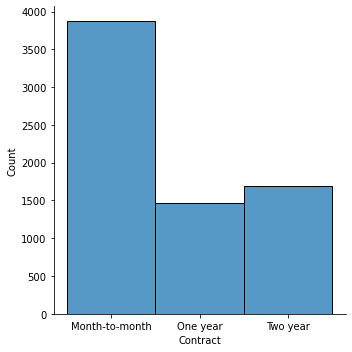

In [39]:
#ploting sns displot for contract
sns.displot(df['Contract'])

* Data is not distributed normally in this column.

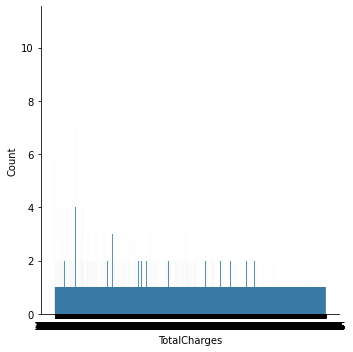

In [40]:
#ploting displot for total charges
sns.displot(df['TotalCharges'])

* Data is not distributed normally in this column.

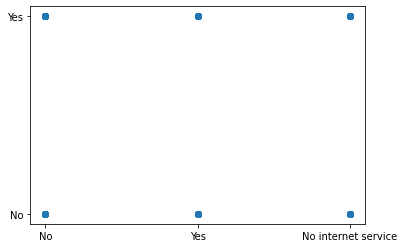

In [41]:
#ploting scatter plot for Tech Support and Churn
plt.scatter(df['TechSupport'],df['Churn'])

* we can see scatter plot of Tech Support and Churn.

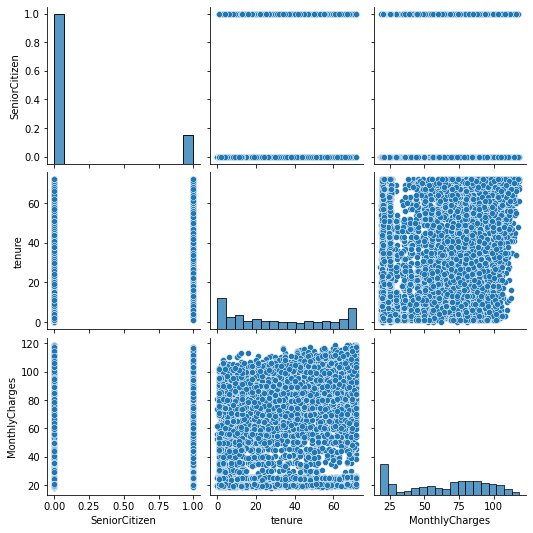

In [42]:
#ploting pairplot
sns.pairplot(df)

* Have to remove missing values.
* Have to drop some negative correlated columns.
* Have to remove the outliers.

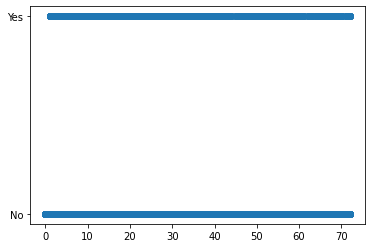

In [43]:
#ploting scatter for tenure and churn
plt.scatter(df['tenure'],df['Churn'])
plt.show()

* We can see scatter plot of tenure and churn

In [44]:
#droping gender columns
df.drop('gender',axis=1,inplace=True)

In [45]:
#checking head
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Encoding Method

In [46]:
#importing Label Encoder 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['customerID']=LE.fit_transform(df['customerID'])

In [47]:
#checking customer unique
df.customerID.unique()

array([5375, 3962, 2564, ..., 3367, 5934, 2226])

In [48]:
#checking data head
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,3962,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2564,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5535,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,6511,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
#importing Label Encoder 
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Partner']=LE.fit_transform(df['Partner'])

In [50]:
#encoding dependents
LE=LabelEncoder()
df['Dependents']=LE.fit_transform(df['Dependents'])

In [51]:
#Encoding phone service
LE=LabelEncoder()
df['PhoneService']=LE.fit_transform(df['PhoneService'])

In [52]:
#Encoding multiple lines
LE=LabelEncoder()
df['MultipleLines']=LE.fit_transform(df['MultipleLines'])

In [58]:
#Encoding internet service
LE=LabelEncoder()
df['InternetService']=LE.fit_transform(df['InternetService'])

In [59]:
#checking head
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetSerivec
0,5375,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,142,2505,0,0
1,3962,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,498,1466,0,0
2,2564,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,436,157,1,0
3,5535,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,266,1400,0,0
4,6511,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,729,925,1,1


In [60]:
#importing label encoder
#encoding columns
LE=LabelEncoder()
df['OnlineBackup']=LE.fit_transform(df['OnlineBackup'])
df['OnlineSecurity']=LE.fit_transform(df['OnlineSecurity'])
df['DeviceProtection']=LE.fit_transform(df['DeviceProtection'])
df['TechSupport']=LE.fit_transform(df['TechSupport'])
df['StreamingTV']=LE.fit_transform(df['StreamingTV'])
df['StreamingMovies']=LE.fit_transform(df['StreamingMovies'])
df['Contract']=LE.fit_transform(df['Contract'])
df['PaperlessBilling']=LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=LE.fit_transform(df['PaymentMethod'])
df['MonthlyCharges']=LE.fit_transform(df['MonthlyCharges'])
df['TotalCharges']=LE.fit_transform(df['TotalCharges'])
df['Churn']=LE.fit_transform(df['Churn'])


In [61]:
#checking head
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetSerivec
0,5375,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,142,2505,0,0
1,3962,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,498,1466,0,0
2,2564,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,436,157,1,0
3,5535,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,266,1400,0,0
4,6511,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,729,925,1,1


## Removing Outliers

In [63]:
#importing zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.91189045, 0.43991649, 1.03453023, ..., 0.39860759, 0.60102348,
        1.18323364],
       [0.21690598, 0.43991649, 0.96662231, ..., 0.94876238, 0.60102348,
        1.18323364],
       [0.47070074, 0.43991649, 0.96662231, ..., 1.64188328, 1.66382851,
        1.18323364],
       ...,
       [0.07574495, 0.43991649, 1.03453023, ..., 0.13968008, 0.60102348,
        1.18323364],
       [1.18683477, 2.27315869, 1.03453023, ..., 0.31653445, 1.66382851,
        0.17225018],
       [0.63694614, 0.43991649, 0.96662231, ..., 1.13801338, 0.60102348,
        0.17225018]])

* Removed the outliers of dataset.

In [64]:
#threshold
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [65]:
df_new=df[(z<3).all(axis=1)]
df_new

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetSerivec
1,3962,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,498,1466,0,0
2,2564,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,436,157,1,0
4,6511,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,729,925,1,1
5,6551,0,0,0,8,1,2,1,0,0,...,0,2,2,0,1,2,1274,6104,1,1
6,1002,0,0,1,22,1,2,1,0,2,...,0,2,0,0,1,1,1075,1550,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758,0,0,0,72,1,0,2,1,1,...,1,1,1,2,1,0,52,770,0,2
7038,4853,0,1,1,24,1,2,0,2,0,...,2,2,2,1,1,3,991,1597,0,0
7039,1525,0,1,1,72,1,2,1,0,2,...,0,2,2,1,1,1,1340,5698,0,1
7041,5934,1,1,0,4,1,2,1,0,0,...,0,0,0,0,1,3,795,2660,1,1


In [66]:
#checking dataset
df.shape

(7043, 21)

* dataset contains 7043 rows and 21 columns.

In [67]:
df_new.shape

(6361, 21)

* dataset contains 6361 rows and 21 columns.

## Standerd Scaler Method

In [70]:
#importing Stansard scaler
from sklearn.preprocessing import StandardScaler
#applying standard scaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(df)


In [71]:
scaledX

array([[ 0.91189045, -0.43991649,  1.03453023, ..., -0.39860759,
        -0.60102348, -1.18323364],
       [ 0.21690598, -0.43991649, -0.96662231, ..., -0.94876238,
        -0.60102348, -1.18323364],
       [-0.47070074, -0.43991649, -0.96662231, ..., -1.64188328,
         1.66382851, -1.18323364],
       ...,
       [-0.07574495, -0.43991649,  1.03453023, ..., -0.13968008,
        -0.60102348, -1.18323364],
       [ 1.18683477,  2.27315869,  1.03453023, ..., -0.31653445,
         1.66382851,  0.17225018],
       [-0.63694614, -0.43991649, -0.96662231, ...,  1.13801338,
        -0.60102348,  0.17225018]])

* We can see the standard scaledX

In [75]:
#importing PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

In [76]:
Y.explained_variance_ratio_

array([1.77597606e-01, 1.24215186e-01, 1.03996610e-01, 5.85001350e-02,
       5.23468296e-02, 4.88174024e-02, 4.72958063e-02, 4.15552221e-02,
       3.98333442e-02, 3.82301636e-02, 3.70648198e-02, 3.53128435e-02,
       3.35669181e-02, 3.29567620e-02, 3.21135354e-02, 2.68086584e-02,
       2.52639195e-02, 2.22821703e-02, 1.25906856e-02, 9.65138247e-03,
       8.29038851e-33])

In [77]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 17.75976056,  30.18127919,  40.58094019,  46.43095368,
        51.66563664,  56.54737688,  61.27695752,  65.43247972,
        69.41581415,  73.2388305 ,  76.94531249,  80.47659684,
        83.83328865,  87.12896485,  90.34031838,  93.02118422,
        95.54757617,  97.7757932 ,  99.03486175, 100.        ,
       100.        ])

In [78]:
#finding cumulative variance
k=np.argmax(var_cumu>99)
print('Number of components explaining 99% variance:',k)

Number of components explaining 99% variance: 18


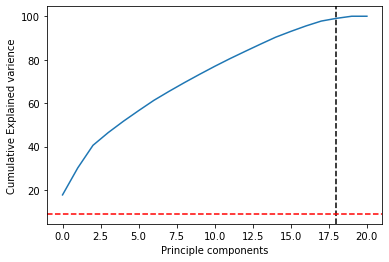

In [79]:
#ploting cumulative variance
plt.ylabel('Cumulative Explained varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color='k',linestyle='--')
plt.axhline(y=9, color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

* Wecan see the x values axis is principle components and y axis is cumulative explained varience.

### Handling Missing Value

In [80]:
#checking null values
df.isnull().sum()

customerID          0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
InternetSerivec     0
dtype: int64

* Dataset contains zero null values 

In [81]:
#filling null values by fill na method 
df['Partner']=df['Partner'].fillna(df['Partner'].mean())
df['tenure']=df['tenure'].fillna(df['tenure'].median())


## Model Building 

In [82]:
x_train=df.drop('Churn',axis=1)
y_train=df.Churn

In [83]:
x_train.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetSerivec
0,5375,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,0
3,5535,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [85]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [86]:
x_train.shape

(7043, 20)

* x train contains 7043 rows and 20 columns 

In [87]:
y_train.shape

(7043,)

* y_train contains 7043 rows

## Classification Method

In [88]:
#importing train test split method
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [89]:
#train test split method
x=df.drop(['Churn'],axis=1)
y=df['Churn']
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [91]:
#writing for loop for train test split method
for i in range(200):
    x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,'at random_state',i)


73.20430107526882 at random_state 0
72.98924731182795 at random_state 1
72.86021505376344 at random_state 2
73.41935483870968 at random_state 3
72.73118279569893 at random_state 4
72.90322580645162 at random_state 5
73.63440860215053 at random_state 6
73.3763440860215 at random_state 7
72.51612903225806 at random_state 8
71.13978494623656 at random_state 9
72.25806451612902 at random_state 10
73.41935483870968 at random_state 11
74.3225806451613 at random_state 12
73.03225806451613 at random_state 13
72.81720430107526 at random_state 14
73.50537634408603 at random_state 15
71.35483870967741 at random_state 16
72.04301075268818 at random_state 17
73.03225806451613 at random_state 18
72.43010752688171 at random_state 19
73.33333333333333 at random_state 20
72.68817204301075 at random_state 21
71.18279569892472 at random_state 22
73.8494623655914 at random_state 23
72.7741935483871 at random_state 24
73.16129032258064 at random_state 25
71.95698924731182 at random_state 26
71.397849462365

### Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print('Best accuracy is',maxAccu,'on Random_state',maxRS)


Best accuracy is 0.7539044013251301 on Random_state 1


In [95]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('Decision Tree Classifier: \n\n',classification_report(y_test,y_pred_dt))
print('Test Accuracy:{}%'.format(round(dt.score(x_test,y_test)*100,2)))


Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.83      0.80      0.81      1555
           1       0.49      0.53      0.51       558

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.73      0.73      2113

Test Accuracy:72.83%


* Decisiont tree classifier hit 72.83% accuracy.

### Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
print('Logistic Regression Classifier: \n\n',classification_report(y_test,y_pred_lr))
print('Test Accuracy:{}%'.format(round(lr.score(x_test,y_test)*100,2)))


Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.54      0.59       558

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Test Accuracy:79.89%


* Logistic Regression hit 79.89% accuracy.

### KNeighbors Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue=0
best_score=0
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score=knn.score(x_train,y_train)
                                best_Kvalue=i
    print('Best KNN Value:{}'.format(best_Kvalue))
    print('Test Accuracy:{}'.format(round(best_score*100,2)))
    
    

Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0
Best KNN Value:1
Test Accuracy:100.0


In [101]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.79      0.90      0.84      1555
           1       0.53      0.32      0.40       558

    accuracy                           0.75      2113
   macro avg       0.66      0.61      0.62      2113
weighted avg       0.72      0.75      0.72      2113

Test Accuracy:74.54%


* KNeighbors Classifier hit 74.54% accuracy.

### SVC

In [103]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1555
           1       0.00      0.00      0.00       558

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.74      0.62      2113

Test Accuracy:73.59%


* The SVC hit 73.59% accuracy.

### GaussianNB

In [106]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1555
           1       0.52      0.74      0.61       558

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113

Test Accuracy:75.15%


* The GaussianNB hit 75.15% accuracy

### Random Forest Classifier

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1555
           1       0.64      0.52      0.58       558

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

Test Accuracy:79.6%


* The Random Forest Classifier hit 79.6% accuracy.

### Cross Validation

In [109]:
#importing cross validation
from sklearn.model_selection import cross_val_score

In [110]:
#cross validation of dissition tree
print(cross_val_score(dt,x,y,cv=5).mean())

0.7248329529324472


In [111]:
#logistic rigression
print(cross_val_score(lr,x,y,cv=5).mean())

0.796535461965288


In [112]:
#knn of cross validation
print(cross_val_score(knn,x,y,cv=5).mean())

0.7408767299503193


In [113]:
#svm cross validation
print(cross_val_score(svm,x,y,cv=5).mean())

0.7346301575908123


In [114]:
#GaussianNB cross validation
print(cross_val_score(nb,x,y,cv=5).mean())

0.7573474498354733


In [115]:
#random forest cross validation
print(cross_val_score(rf,x,y,cv=5).mean())

0.7911413639589651


### Hyperparameter Tunning

In [116]:
#importing gridsearchCV
from sklearn.model_selection import GridSearchCV

In [117]:
param_grid = {
    'max_depth':[6,7,8],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion' :['gini','entropy']
}

In [118]:
rf=RandomForestClassifier()

In [119]:
rf_cv = GridSearchCV(rf, param_grid, cv=5)

In [120]:
rf_cv.fit(x,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

### AUC ROC Curve

In [123]:
#importing roc auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [124]:
#random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.  , 0.04, 0.77, ..., 0.17, 0.19, 0.71])

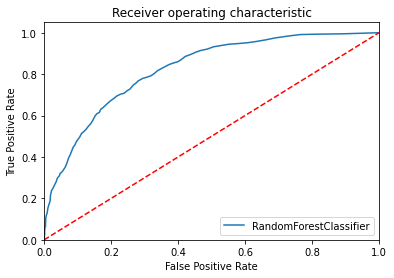

In [125]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='RandomForestClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

* Here plot contains false positive rate on x axis and ture positive rate on y axis for random forest classifier

### Evaluating The Final Model

In [126]:
Final_mod = RandomForestClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

79.649787032655


### Saving The Model

In [127]:
import joblib
joblib.dump(Final_mod,'Customer Churn Prediction.csv')

['Customer Churn Prediction.csv']

* Save the model

### Prediction Method

In [128]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
preds = rf.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0]


* The train and test data is balanced most of the classification methods hit the 79.64% accuracy with the dataset.